## Code to make paths to data

### Stratified train-val-test split

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from collections import Counter, defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
labels_map = {
    "Benign": 0,
    "InSitu": 1,
    "Invasive": 2,
}

In [6]:
with open('paths.txt', 'r') as file:
    img_paths = file.read().split('\n')
    
img_paths = np.array(img_paths)
y = []
img_labels = pd.read_csv('../Data/burnasyan_Br.csv')
for item in img_paths:
    img_folder = int(item.split("/")[3])
    label_name = img_labels.iloc[img_folder - 1][4]
    label = labels_map[label_name]
    y.append(label)
train_test_paths, val_paths, y_train_test, y_val = train_test_split(img_paths, y, test_size=0.25,
                                                     random_state=42, stratify=y)

train_paths, test_paths, y_train, y_test = train_test_split(train_test_paths, y_train_test,
                                                          test_size=0.2,random_state=42,
                                                          stratify=y_train_test)
print("Train size: ", train_paths.shape[0])
print("Val size: ", val_paths.shape[0])
print("Test size: ", test_paths.shape[0])

with open('train_paths.txt', 'w') as file:
    for i in range(train_paths.shape[0] - 1):
        file.write(train_paths[i] + '\n')  
    file.write(train_paths[train_paths.shape[0] - 1])
    
with open('val_paths.txt', 'w') as file:
    for i in range(val_paths.shape[0] - 1):
        file.write(val_paths[i] + '\n')  
    file.write(val_paths[val_paths.shape[0] - 1])
    
with open('test_paths.txt', 'w') as file:
    for i in range(test_paths.shape[0] - 1):
        file.write(test_paths[i] + '\n')  
    file.write(test_paths[test_paths.shape[0] - 1])

Train size:  25223
Val size:  10510
Test size:  6306


### Checking the destributions of splitted data

In [18]:
train_counts = defaultdict(int)
for l in y_train:
    train_counts[l] += 1 / train_paths.shape[0]

train_counts_df = pd.DataFrame.from_dict(train_counts, orient='index')
train_counts_df.columns = ['train_count']
train_counts_df.sort_values('train_count', ascending=False, inplace=True)

val_counts = defaultdict(int)
for l in y_val:
    val_counts[l] += 1 / val_paths.shape[0]

val_counts_df = pd.DataFrame.from_dict(val_counts, orient='index')
val_counts_df.columns = ['val_count']
val_counts_df.sort_values('val_count', ascending=False, inplace=True)

test_counts = defaultdict(int)
for l in y_test:
    test_counts[l] += 1 / test_paths.shape[0]

test_counts_df = pd.DataFrame.from_dict(test_counts, orient='index')
test_counts_df.columns = ['test_count']
test_counts_df.sort_values('test_count', ascending=False, inplace=True)

In [21]:
counts_df = pd.concat([train_counts_df,val_counts_df,test_counts_df], axis=1)
counts_df.head()

,train_count,val_count,test_count
2,0.633898,0.634008,0.633893
0,0.333792,0.333688,0.333814
1,0.032310,0.032304,0.032293


In [28]:
print(data)

[[0.63389846 0.63400781 0.63389317]
 [0.33379194 0.33368832 0.33381388]
 [0.0323096  0.03230387 0.03229294]]


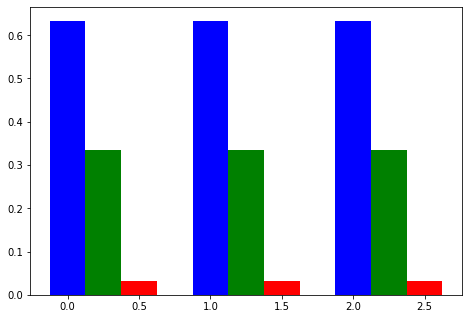

In [32]:
data = counts_df.to_numpy()
X = np.arange(3)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
ax.bar(X + 0.50, data[2], color = 'r', width = 0.25)
None